In [1]:
import pandas as pd

df = pd.read_csv("fake_job_postings.csv")

In [2]:
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
df.shape

print(f"Number of Rows = {df.shape[0]}")
print(f"Number of Columns = {df.shape[1]}")

Number of Rows = 17880
Number of Columns = 18


In [4]:
df["fraudulent"].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

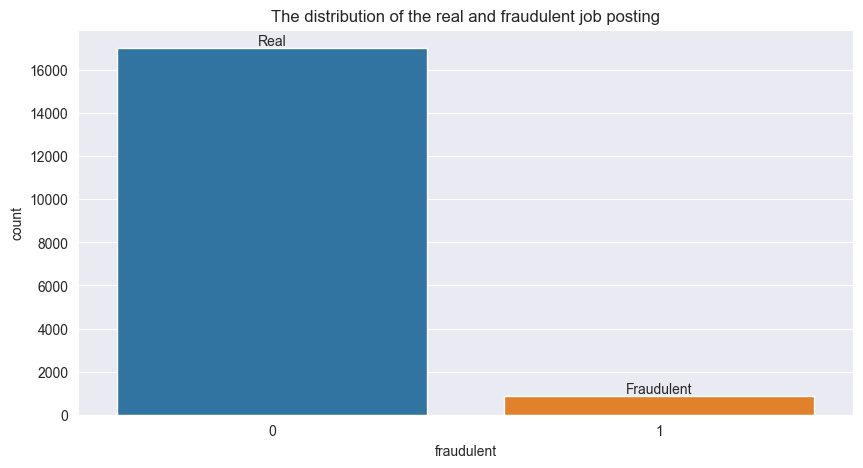

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Real & Fraudulent
plt.figure(figsize = (10,5))
labels = ['Real', 'Fraudulent']
sns.set_style("darkgrid")
bx=sns.countplot(x = "fraudulent",data = df)
plt.title('The distribution of the real and fraudulent job posting')
bx.bar_label(bx.containers[0], fmt='%g', label_type = 'edge', labels = labels)

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# check number of null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<Axes: >

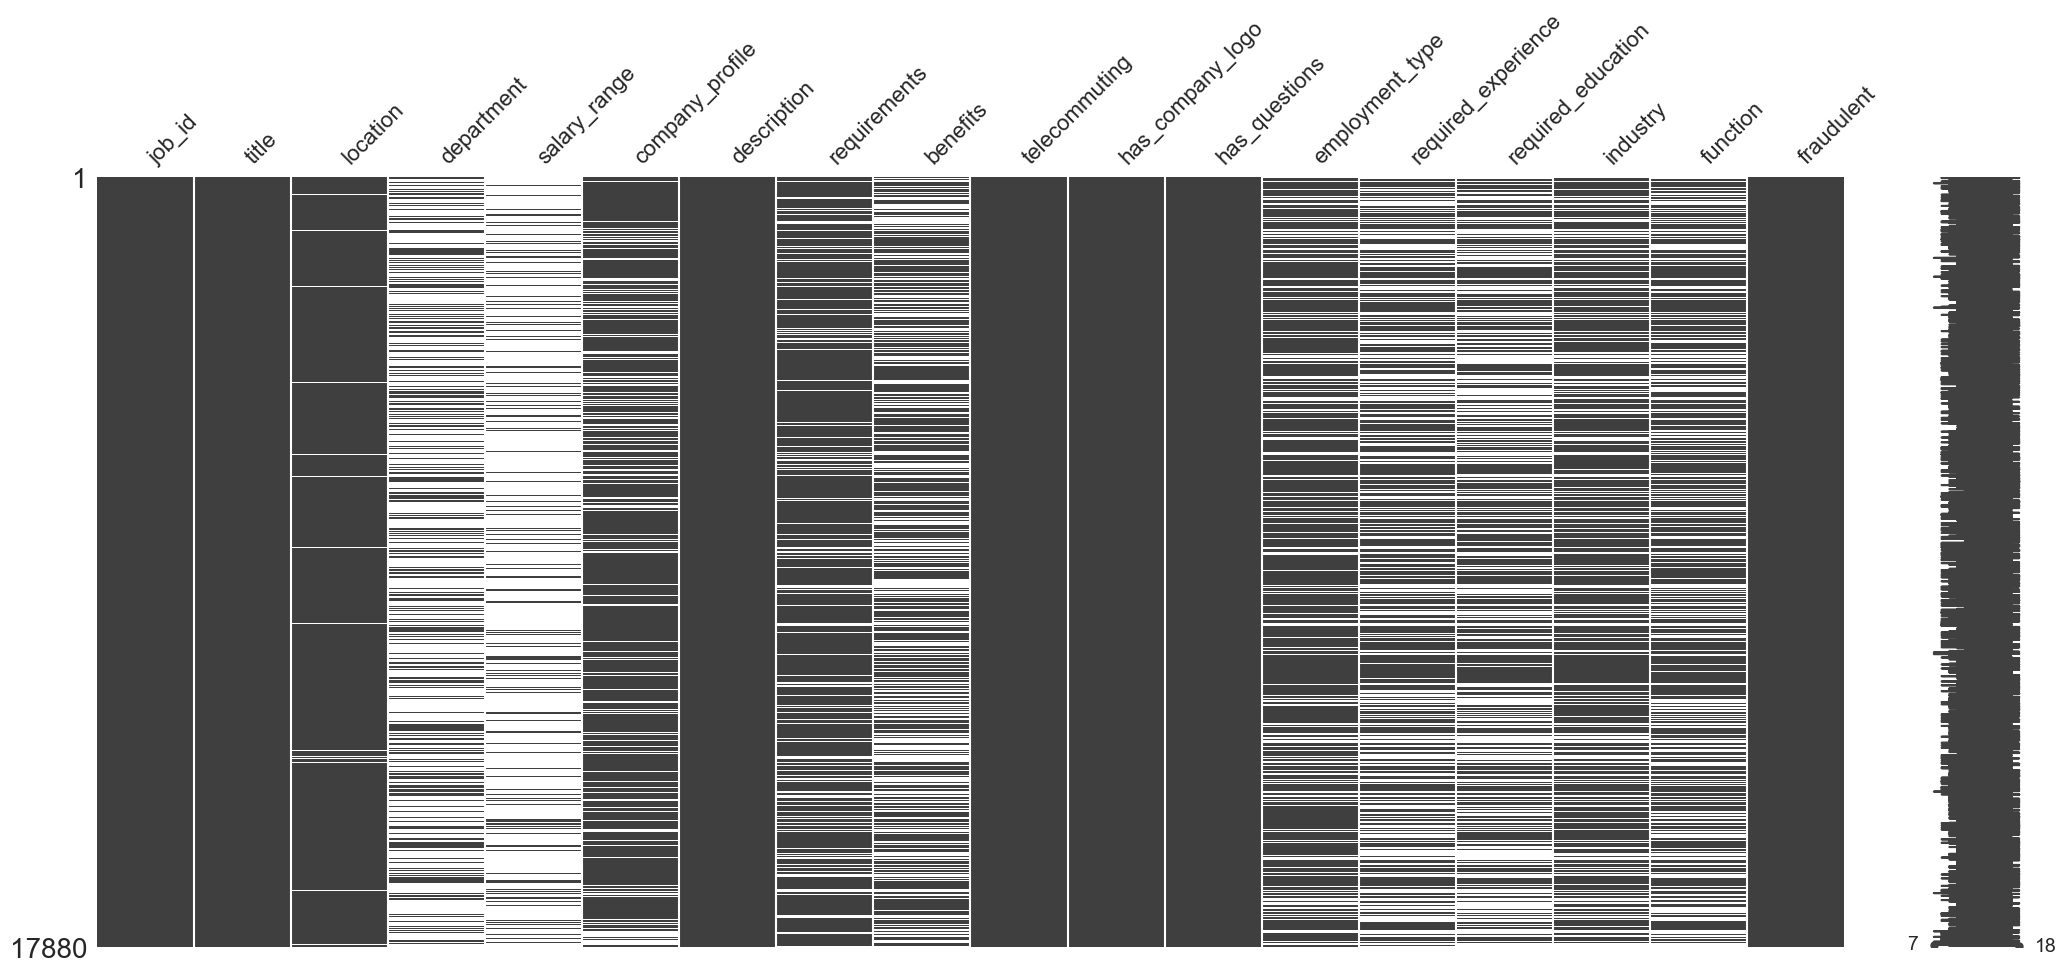

In [8]:
import missingno

# checking missing data in the dataframe.
missingno.matrix(df)

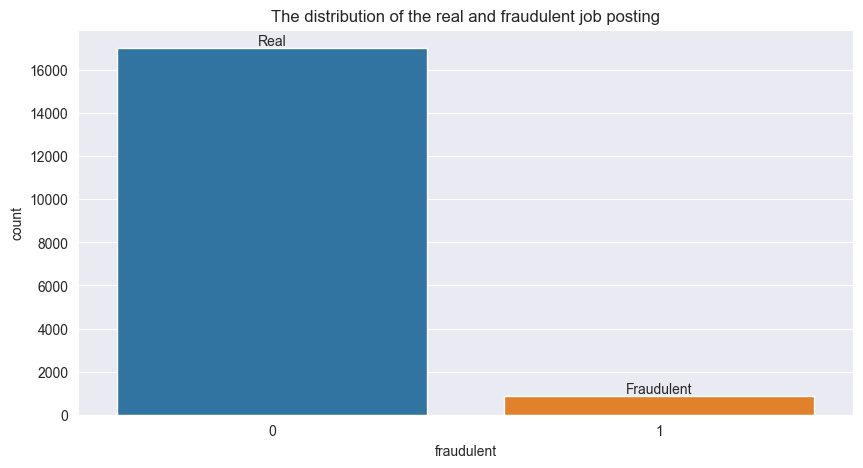

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Real & Fraudulent
plt.figure(figsize = (10,5))
labels = ['Real', 'Fraudulent']
sns.set_style("darkgrid")
bx=sns.countplot(x = "fraudulent",data = df)
plt.title('The distribution of the real and fraudulent job posting')
bx.bar_label(bx.containers[0], fmt='%g', label_type = 'edge', labels = labels)

plt.show()

In [10]:
# drop unnecessary columns
columns = ['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type']

for col in columns:
    del df[col]

In [11]:
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits required_experience  \
0                                                NaN          Internship   
1  What you will get from usThrough being part of...      Not Applicable   
2                                                NaN                 NaN   
3  Our culture is anything but corporate—we have ...    Mid-Senior level   
4                              Full Benefits Offered    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [12]:
df.fillna('', inplace=True)

In [13]:
print(df[df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [14]:
print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [15]:
df['words'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

del df['title']
del df['location'] 
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [16]:
df.head()

fraudulent                                              words
0           0  Marketing Intern We're Food52, and we've creat...
1           0  Customer Service - Cloud Video Production 90 S...
2           0  Commissioning Machinery Assistant (CMA) Valor ...
3           0  Account Executive - Washington DC Our passion ...
4           0  Bill Review Manager SpotSource Solutions LLC i...

In [17]:
realjob_postings = df[df.fraudulent==0].words
fakejob_postings = df[df.fraudulent==1].words

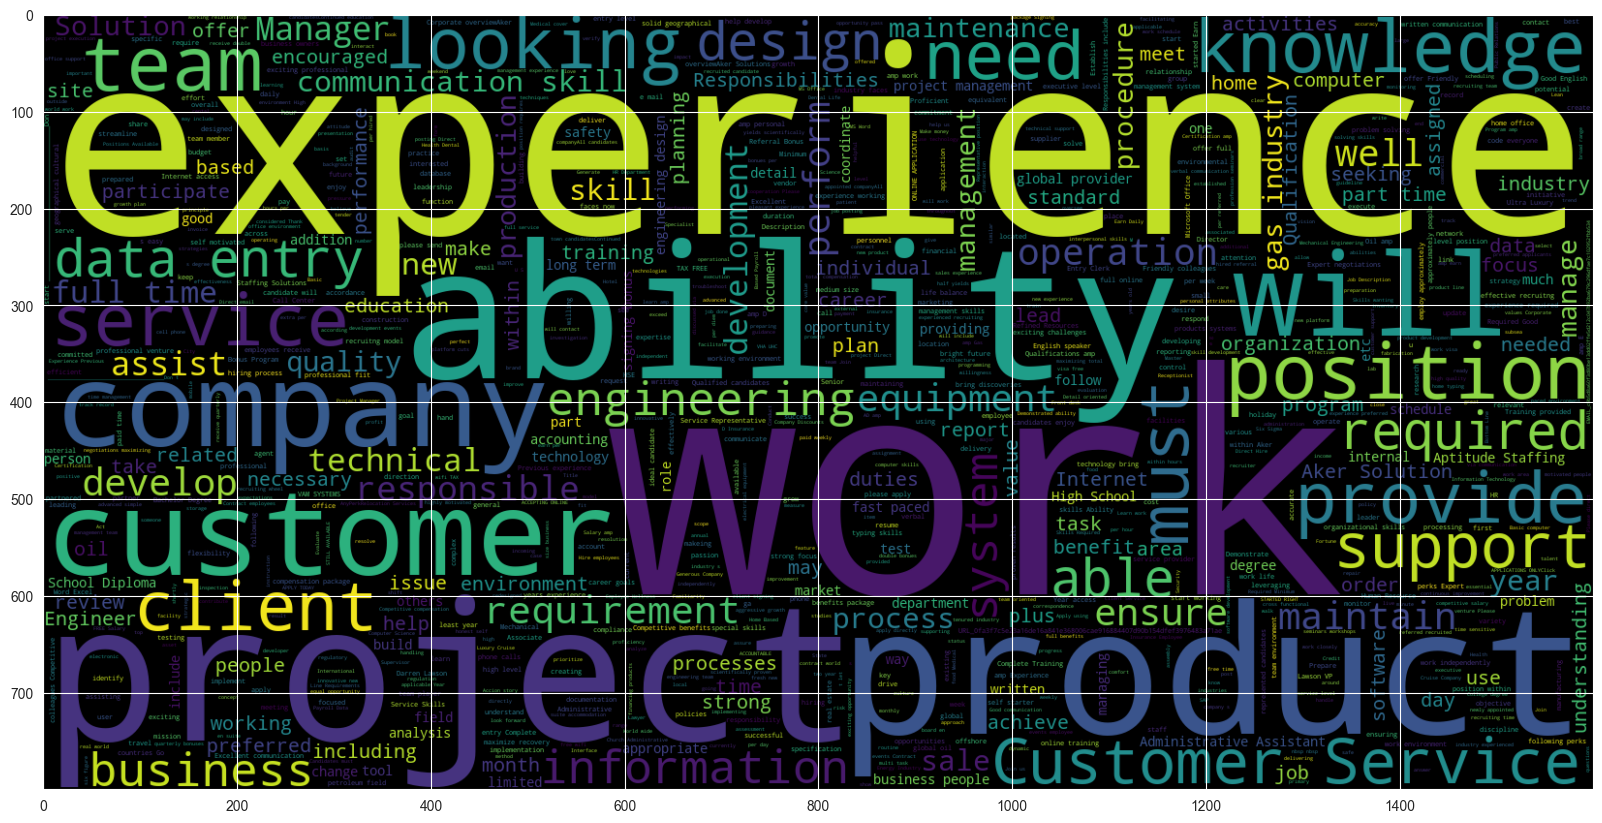

In [18]:
from wordcloud import WordCloud

# Wordcloud for fake jobs
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(fakejob_postings))
plt.imshow(wc , interpolation = 'bilinear')

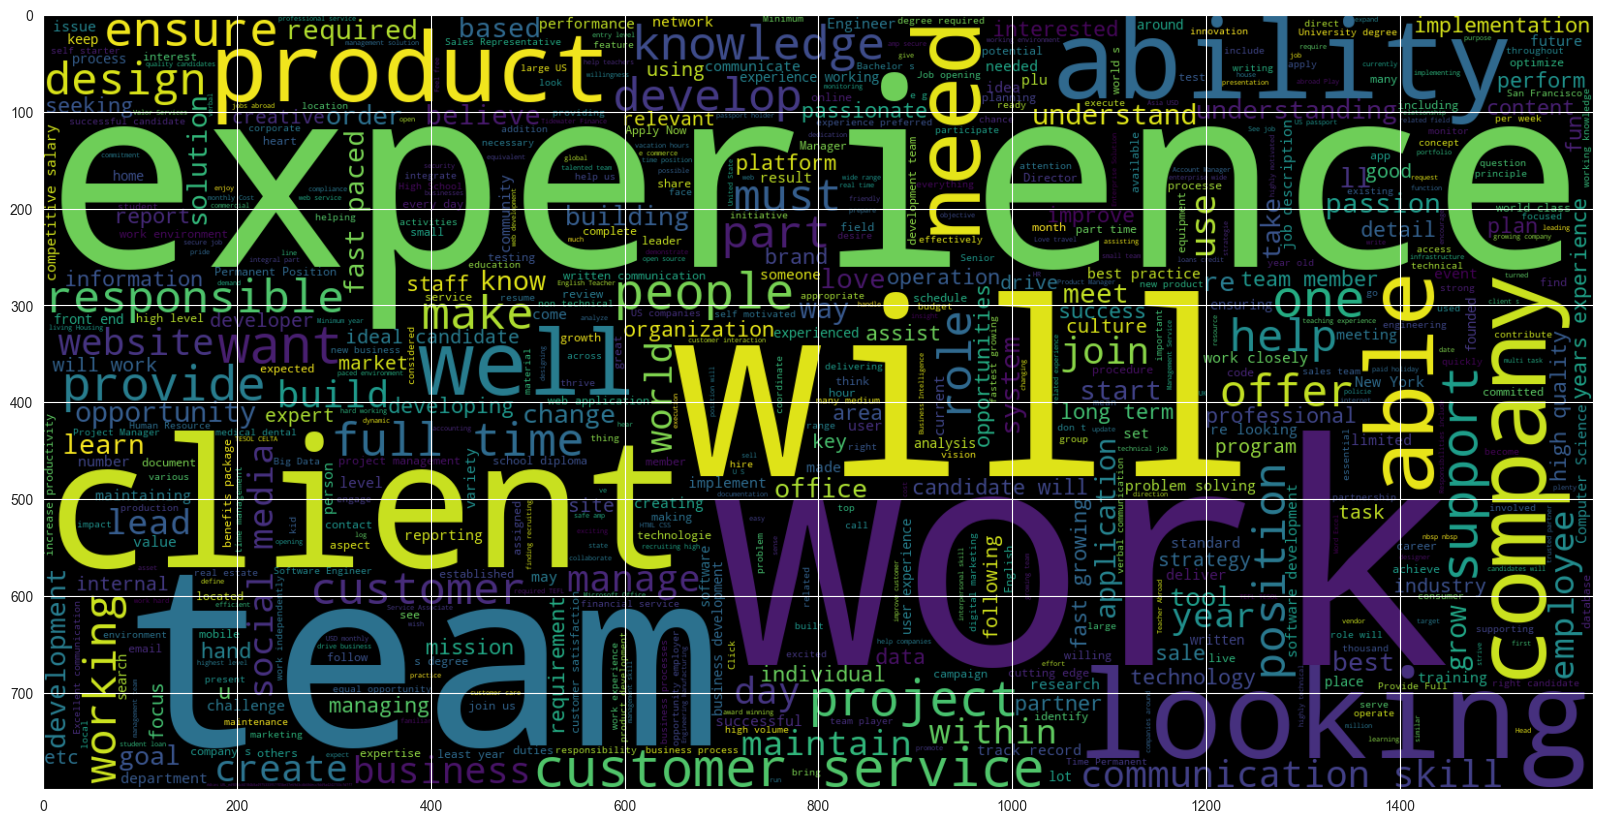

In [19]:
# Wordcloud for real jobs
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(realjob_postings))
plt.imshow(wc , interpolation = 'bilinear')

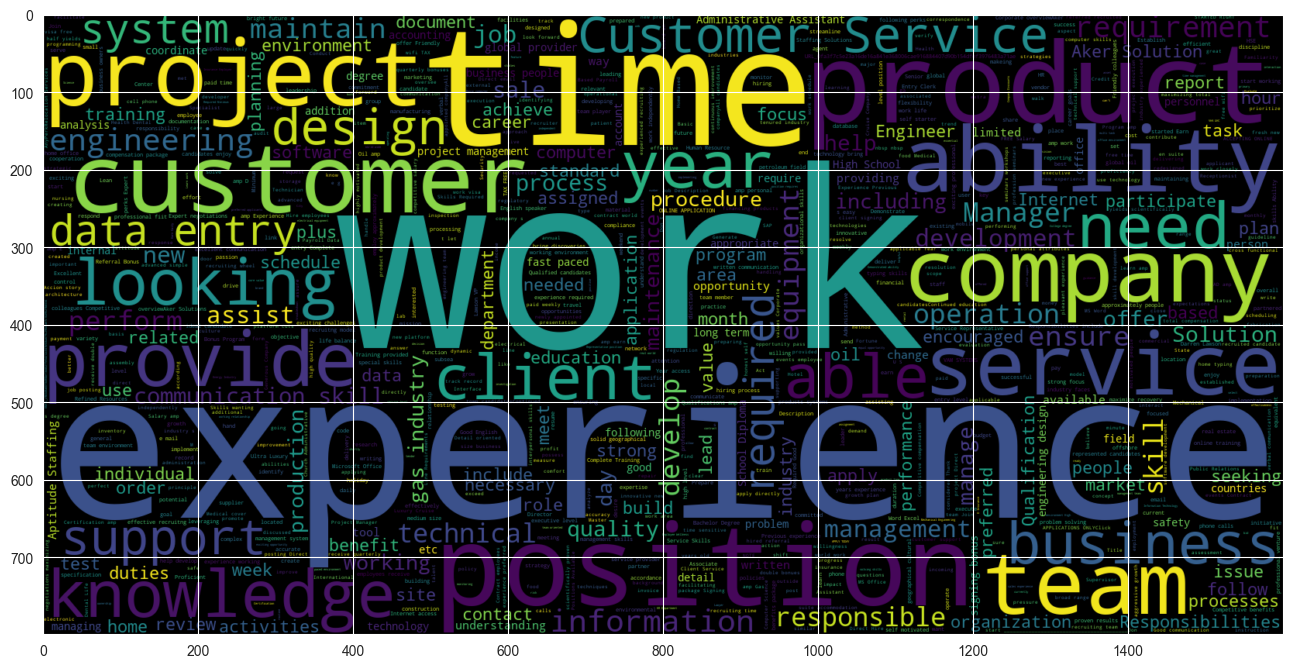

In [21]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

stop_words = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16, 14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = stop_words).generate(str(" ".join(fakejob_postings)))
plt.imshow(wc,interpolation = 'bilinear')

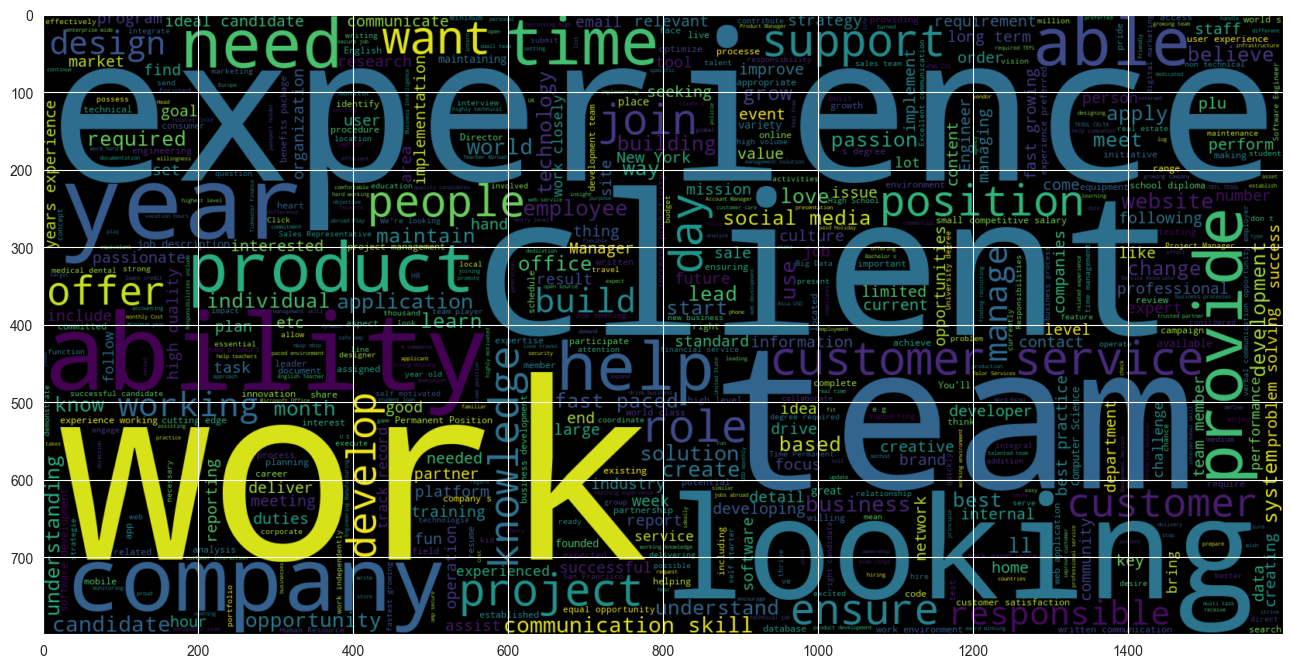

In [22]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16, 14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = stop_words).generate(str(" ".join(realjob_postings)))
plt.imshow(wc,interpolation = 'bilinear')

In [33]:
import string

# Create a list of punctuation marks
punctuation_list = string.punctuation

# Create a list of stopwords using spaCy
nlp = spacy.load("en_core_web_sm")
stopwords_list = spacy.lang.en.stop_words.STOP_WORDS

# Load the English tokenizer, tagger, parser, NER, and word vectors
tokenizer = English()

# Define a custom tokenization function
def custom_tokenizer(text):
    # Create a Doc object, which is used to process text with linguistic annotations
    tokens = tokenizer(text)

    # Lemmatize each token and convert them to lowercase
    tokens = [token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in tokens]

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stopwords_list and token not in punctuation_list]

    # Return the preprocessed list of tokens
    return tokens

In [35]:
from sklearn.base import TransformerMixin

# Custom text transformer using spaCy
class TextCleanerTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        # Clean the text
        return [preprocess_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to preprocess the text
def preprocess_text(text):
    # Remove leading and trailing spaces and convert text to lowercase
    return text.strip().lower()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag of words (BoW) vectorizer
bow_vectorizer = CountVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 3))

In [40]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.words, df.fraudulent, test_size=0.2)